# DEMO TO USE AUTOENCODER FUNCTIONS

This notebook is use the autoencoder functions to correct tracking errors.

In [1]:
import sys

### Provide the path to the code directory
sys.path.append('/Users/senaagezo/PycharmProjects/AutoPoseMapper/')

In [2]:
from autoposemapper.autoencoder.autoencoder_tools import AutoEncoderHelper
from autoposemapper.autoencoder.autoencoder_train import AutoTrain
from autoposemapper.autoencoder import utils as AE_utils
from autoposemapper.auxiliary_tools import utils as AX_utils

In [3]:
project_path = '/Users/senaagezo/Downloads/AutoTest-Sena-2022-04-22/'

In [4]:
autoenc = AutoEncoderHelper(project_path)

### Egocenter the files 

In [5]:
autoenc.egocenter_files(bind_center='midBody', b1='Nose', b2='tailStart', 
                            drop_point=True, which_points=['tailEnd'])

/Users/senaagezo/Downloads/AutoTest-Sena-2022-04-22/autoencoder_data/PPT_1A_2021_10_27_first_thirty_CNN.h5


100%|█████████████████████████████████████████████████████████████████████████████| 53999/53999 [00:00<00:00, 162620.72it/s]


### Train Autoencoder Network

In [6]:
autotrain = AutoTrain(project_path)

The coding size and the number of determines the performance of the network.   
Tested with my data the following works well.  
For Stacked Autoencoder Network:
- coding_size = 16
- epochs = 100

In [7]:
history, network = autotrain.auto_train_initial(scorer_type='CNN', encoder_type='SAE', 
                                                coding_size=16, epochs=10)

2022-04-17 13:53:56.890994: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Cohab1_pre_20211025_124326434_CNN_ego_animal_1_data
Epoch 1/10
169/172 [============================>.] - ETA: 0s - loss: 3247.5317 - accuracy: 0.1991
Epoch 1: val_loss improved from inf to 1222.55261, saving model to /Users/senaagezo/Downloads/AutoTest-Sena-2022-04-17/Training/training_SAE_16/cp-0001.ckpt
172/172 [==============================] - 4s 13ms/step - loss: 3237.8953 - accuracy: 0.2000 - val_loss: 1222.5526 - val_accuracy: 0.4567
Epoch 2/10
171/172 [============================>.] - ETA: 0s - loss: 1390.7826 - accuracy: 0.4422
Epoch 2: val_loss improved from 1222.55261 to 439.63159, saving model to /Users/senaagezo/Downloads/AutoTest-Sena-2022-04-17/Training/training_SAE_16/cp-0002.ckpt
172/172 [==============================] - 2s 12ms/step - loss: 1390.6210 - accuracy: 0.4423 - val_loss: 439.6316 - val_accuracy: 0.6033
Epoch 3/10
167/172 [============================>.] - ETA: 0s - loss: 367.6041 - accuracy: 0.8347
Epoch 3: val_loss improved from 439.63159 to 132.56036, s

2022-04-17 13:54:41.849737: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /Users/senaagezo/Downloads/AutoTest-Sena-2022-04-17/Training/models/model_SAE_16_0/assets


Check the performance of the network

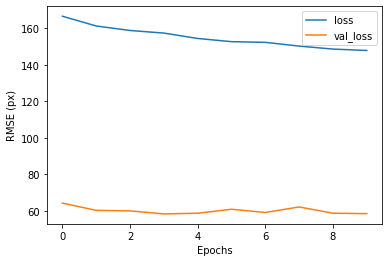

In [9]:
autoencoder.utils.model_loss_plots(history)

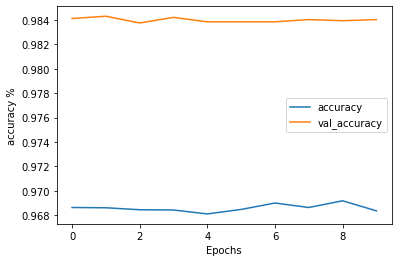

In [10]:
autoencoder.utils.model_accuracy_plots(history)

##### Create Skeleton of egocenter before running this code below

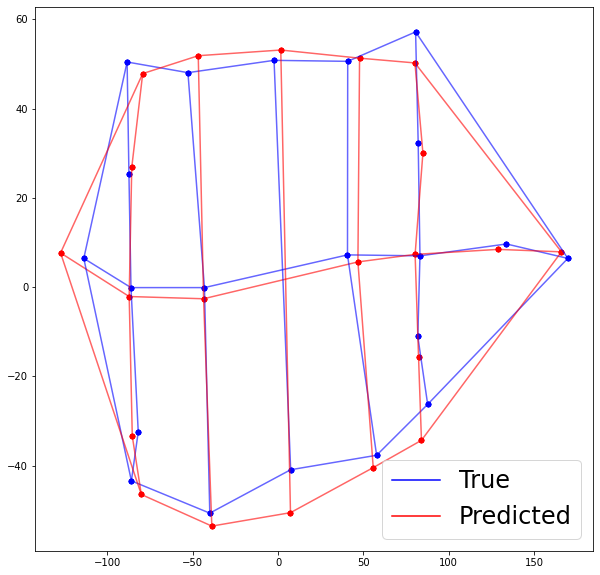

In [12]:
autoencoder.utils.plot_trained_points(network, project_path, frame_number=1500)

##### If you trained a Variational Autoencoder Network, VAE, you can use the code below

In [ ]:
autoencoder.utils.generate_random_animal_w_vae(auto, project_path)

##### Re-train the network if needed

In [ ]:
history, network = autotrain.auto_retrain(scorer_type='CNN', encoder_type='SAE', 
                                          coding_size=16, epochs=10)

### Predict with the Trained Network

In [13]:
autotrain.predict_w_trained_network(scorer_type='CNN', encoder_type='SAE')

/Users/senaagezo/Downloads/AutoTest-Sena-2022-04-17/Training/models/model_SAE_16_0
/Users/senaagezo/Downloads/AutoTest-Sena-2022-04-17/autoencoder_data/Cohab1_pre_20211025_124326434/Cohab1_pre_20211025_124326434_SAE_ego_animal_1_data.mat
/Users/senaagezo/Downloads/AutoTest-Sena-2022-04-17/autoencoder_data/Cohab1_pre_20211025_124326434/Cohab1_pre_20211025_124326434_SAE_ego_animal_2_data.mat


### Re-orient the egocentered Autoencoder files to original locations

In [5]:
autoenc.reorient_files(encoder_type='SAE')

/Users/senaagezo/Downloads/AutoTest-Sena-2022-04-17/autoencoder_data/Cohab1_pre_20211025_124326434/Cohab1_pre_20211025_124326434_SAE_animal_1_data.mat


100%|█████████████████████████████████████████████████████████████████████████████| 54733/54733 [00:00<00:00, 146624.46it/s]


/Users/senaagezo/Downloads/AutoTest-Sena-2022-04-17/autoencoder_data/Cohab1_pre_20211025_124326434/Cohab1_pre_20211025_124326434_SAE_animal_2_data.mat


100%|█████████████████████████████████████████████████████████████████████████████| 54733/54733 [00:00<00:00, 149177.29it/s]


### Create Pandas' table-style h5 files

In [5]:
autoenc.save_mat_to_h5(encoder_type='SAE')

 50%|████████████████████████████████████████████▌                                            | 1/2 [00:00<00:00,  5.55it/s]

Cohab1_pre_20211025_124326434_SAE_animal_1_data.h5
Cohab1_pre_20211025_124326434_SAE_animal_2_data.h5


100%|█████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  7.48it/s]


### Check the h5 files

In [6]:
file_path = '/Users/senaagezo/Downloads/AutoTest-Sena-2022-04-17/autoencoder_data/Cohab1_pre_20211025_124326434/Cohab1_pre_20211025_124326434_SAE_animal_1_data.h5'

In [7]:
auxiliary_tools.utils.check_pandas_h5(file_path)

scorer    Stacked_Autoencoder                                        \
bodyparts                Nose                  leftEar                
coords                      x            y           x            y   
0                  438.582455  1342.469833  438.368198  1258.625668   
1                  438.582455  1342.469833  438.368198  1258.625668   
2                  461.225708  1313.050346  427.931778  1244.347546   
3                  467.073738  1309.713501  438.145981  1238.274710   
4                  503.526802  1305.274010  458.176430  1233.161657   
...                       ...          ...         ...          ...   
54728              336.178116   475.237061  395.323116   423.600204   
54729              336.178188   475.237061  395.323156   423.600075   
54730              336.178116   475.237061  395.323116   423.600204   
54731              336.178188   475.237061  395.323156   423.600075   
54732              336.177296   475.250053  395.317345   423.606476   

scorer                                                                   \
bodyparts betweenEars                 rightEar                  leftHip   
coords              x            y           x            y           x   
0          401.472351  1274.510208  364.354052  1295.582329  395.664625   
1          401.472351  1274.510208  364.354052  1295.582329  395.664625   
2          397.023487  1268.226166  364.724735  1297.166374  390.067474   
3          408.415371  1263.722668  378.513767  1293.362984  385.370878   
4          433.894394  1263.972328  408.353586  1298.074699  378.952682   
...               ...          ...         ...          ...         ...   
54728      357.863194   409.938564  318.787483   404.058548  438.499645   
54729      357.863235   409.938465  318.787529   404.058399  438.499630   
54730      357.863194   409.938564  318.787483   404.058548  438.499645   
54731      357.863235   409.938465  318.787529   404.058399  438.499630   
54732      357.855541   409.949974  318.778755   404.073833  438.484379   

scorer                  ...                                    \
bodyparts               ... betweenEars_rightEar                
coords               y  ...                    x            y   
0          1120.421486  ...           383.037016  1287.987679   
1          1120.421486  ...           383.037016  1287.987679   
2          1125.218506  ...           382.420849  1285.659790   
3          1120.000244  ...           394.729914  1280.744911   
4          1115.092155  ...           424.411213  1284.189774   
...                ...  ...                  ...          ...   
54728       297.979359  ...           336.648926   407.832527   
54729       297.979294  ...           336.648941   407.832439   
54730       297.979359  ...           336.648926   407.832527   
54731       297.979294  ...           336.648941   407.832439   
54732       297.978199  ...           336.641003   407.845886   

scorer                                                                  \
bodyparts betweenEars_midBody              midBody_midHip                
coords                      x            y              x            y   
0                  389.300393  1247.919567     362.859863  1166.306034   
1                  389.300393  1247.919567     362.859863  1166.306034   
2                  378.423229  1245.035324     351.208842  1165.342186   
3                  388.691927  1242.068840     351.817602  1165.275871   
4                  406.661245  1242.793011     352.920969  1166.777714   
...                       ...          ...            ...          ...   
54728              365.505387   386.248764     387.587615   314.497601   
54729              365.505438   386.248604     387.587634   314.497520   
54730              365.505387   386.248764     387.587615   314.497601   
54731              365.505438   386.248604     387.587634   314.497520   
54732              365.494650   386.258194     387.572207   314.499977   

scorer

### Combine H5 files

In [8]:
autoenc.combine_animal_h5_files(encoder_type='SAE')

/Users/senaagezo/Downloads/AutoTest-Sena-2022-04-17/autoencoder_data/Cohab1_pre_20211025_124326434/Cohab1_pre_20211025_124326434_SAE_animal_1_data.h5

/Users/senaagezo/Downloads/AutoTest-Sena-2022-04-17/autoencoder_data/Cohab1_pre_20211025_124326434/Cohab1_pre_20211025_124326434_SAE_animal_2_data.h5

